In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-05-08 15:36:28--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-05-08 15:36:28--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.04s   

2022-05-08 15:36:28 (1.30 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

Треугольный сигнал

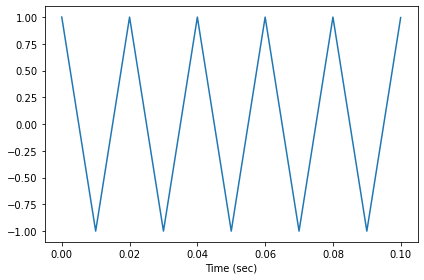

In [4]:
from thinkdsp import TriangleSignal

in_wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (sec)')

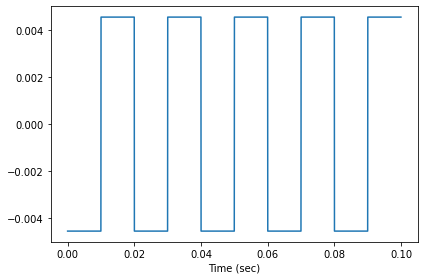

In [8]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Time (sec)')

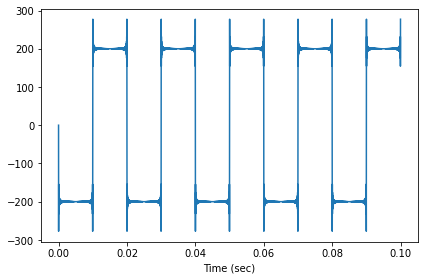

In [7]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
decorate(xlabel='Time (sec)')

Упражнение 2

Квадратный сигнал

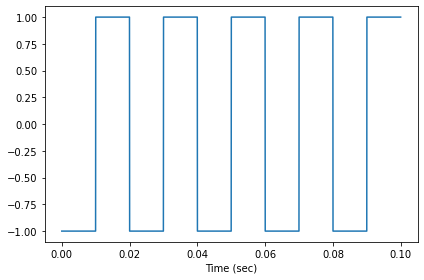

In [10]:
from thinkdsp import SquareSignal

in_wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (sec)')

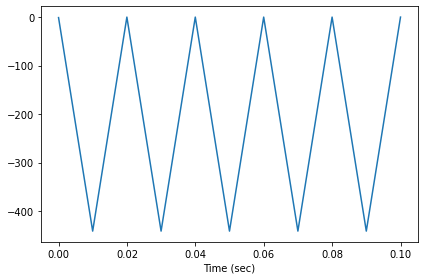

In [12]:
out_wave = in_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (sec)')

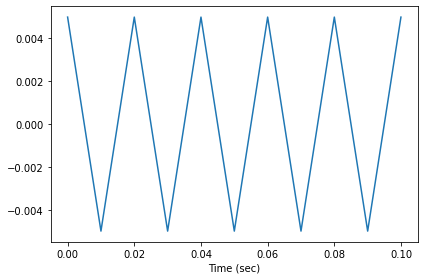

In [14]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (sec)')

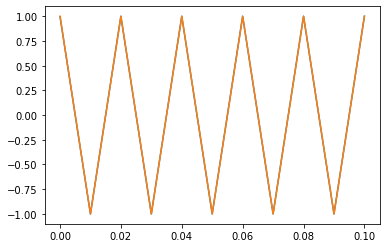

In [15]:
out_wave.unbias()
out_wave.normalize()
out_wave2.normalize()
out_wave.plot()
out_wave2.plot()

In [16]:
out_wave.max_diff(out_wave2)

0.0045351473922902175

Упражнение 3

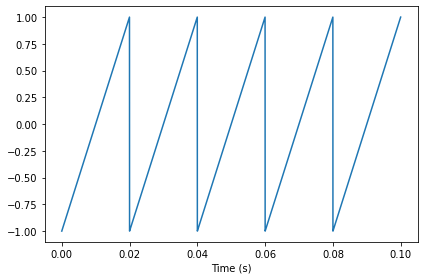

In [17]:
from thinkdsp import SawtoothSignal

in_wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Первая кумулятивная сумма зубца пилы – это парабола:

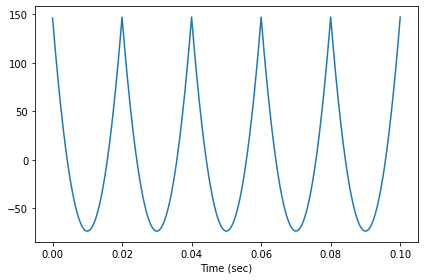

In [19]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
decorate(xlabel='Time (sec)')

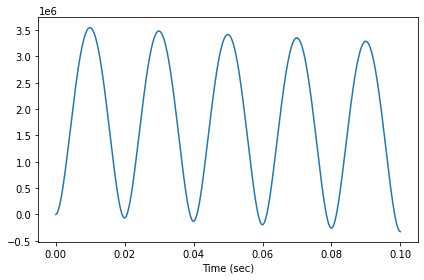

In [21]:
out_wave = out_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (sec)')

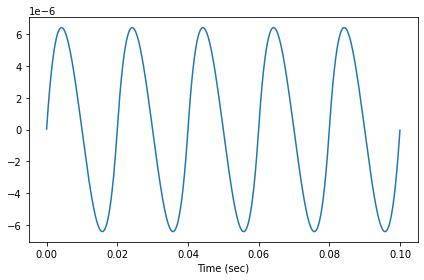

In [23]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (sec)')

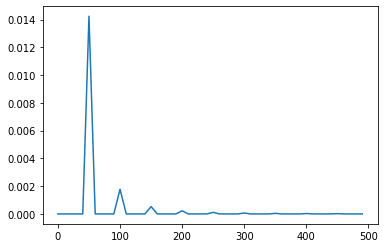

In [24]:
out_wave2.make_spectrum().plot(high=500)

В этот момент результат все больше и больше напоминает синусоиду.

Упражнение 4

Кубический сигнал

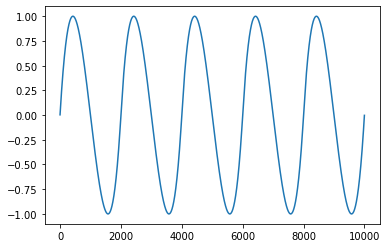

In [25]:
from thinkdsp import CubicSignal

in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

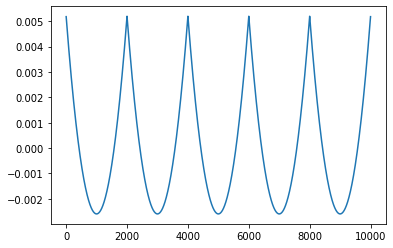

In [26]:
out_wave = in_wave.diff()
out_wave.plot()

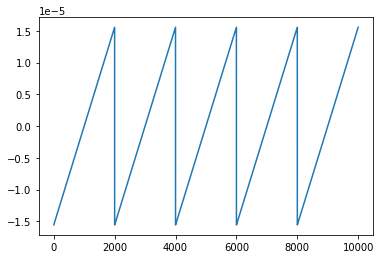

In [27]:
out_wave = out_wave.diff()
out_wave.plot()

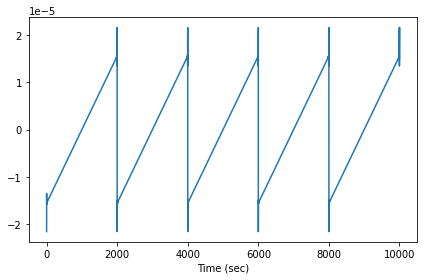

In [29]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (sec)')

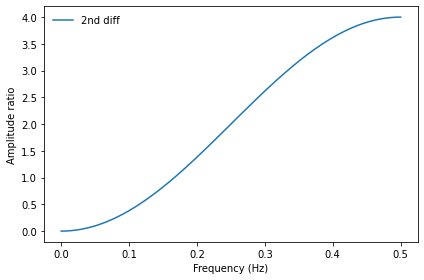

In [30]:
from thinkdsp import zero_pad
from thinkdsp import Wave

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

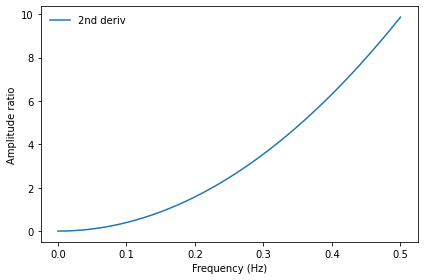

In [31]:
PI2 = np.pi * 2

deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

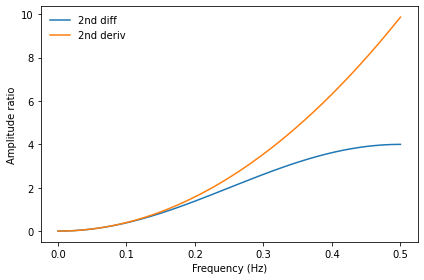

In [32]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Оба являются фильтрами верхних частот, которые усиливают высокочастотные компоненты. Вторая производная является параболической, поэтому она больше всего усиливает самые высокие частоты. 2-я разность является хорошей аппроксимацией 2-й производной только на самых низких частотах, далее она существенно отклоняется.